# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [34]:
import csv
from collections import Counter

# Function to read data from a CSV file
def read_csv(file_path):
    with open(file_path, encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader, None)  # Skip header if exists
        return [row[0] for row in reader]

# Function to generate n-grams
def n_grams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

# Simple method to extract noun phrases (for demonstration, not accurate)
def extract_noun_phrases(text):
    words = text.split()
    noun_phrases = [' '.join(words[i:i+2]) for i in range(len(words) - 1) if words[i][0].isupper() and words[i+1][0].isupper()]
    return noun_phrases

# Load the dataset and limit to the first 100 reviews
file_path = 'imdb_reviews_output.csv'  # Change to your file path in Colab
reviews = read_csv(file_path)[:100]

# Process text for N-gram analysis
all_tokens = [token for review in reviews for token in review.split()]

# (1) Count the frequency of all 3-grams
trigram_counts = Counter(n_grams(all_tokens, 3))

# (2) Calculate the probabilities for all bigrams
bigram_counts = Counter(n_grams(all_tokens, 2))
unigram_counts = Counter(n_grams(all_tokens, 1))
bigram_probabilities = {bigram: count / unigram_counts[(bigram[0],)] for bigram, count in bigram_counts.items()}

# (3) Extract noun phrases and calculate relative probabilities
all_noun_phrases = set()
review_noun_phrases = [extract_noun_phrases(review) for review in reviews]
all_noun_phrases = set(np for rnp in review_noun_phrases for np in rnp)
noun_phrase_counts = Counter(np for rnp in review_noun_phrases for np in rnp)
max_frequency = max(noun_phrase_counts.values(), default=1)
relative_probabilities = {np: count / max_frequency for np, count in noun_phrase_counts.items()}

# Print N-gram frequencies and probabilities
print("Trigram Counts:")
for trigram, count in trigram_counts.items():
    print(f"{' '.join(trigram):<20} : {count}")

print("\nBigram Probabilities:")
for bigram, probability in bigram_probabilities.items():
    print(f"{' '.join(bigram):<15} : {probability:.2f}")

# Print noun phrase relative probabilities in a table
print("\nNoun Phrase Relative Probabilities:")
print(f"{'Review':<10}", ' '.join([f"{np:<20}" for np in sorted(all_noun_phrases)]))
for i, rnp in enumerate(review_noun_phrases):
    print(f"Review {i+1:<4}", ' '.join([f"{rnp.count(np) / max_frequency:.2f}" for np in sorted(all_noun_phrases)]))



Streaming output truncated to the last 5000 lines.
met most of          : 4
most of my           : 4
of my expectations   : 4
my expectations except : 4
expectations except a : 4
except a few         : 4
a few minor          : 4
few minor things.    : 4
minor things. I      : 4
things. I didn't     : 4
I didn't love        : 4
didn't love the      : 4
love the character   : 4
the character Phoebe : 4
character Phoebe Waller : 4
Waller Bridge played, : 4
Bridge played, but   : 4
played, but she      : 4
but she did          : 4
she did play         : 4
did play it          : 4
play it believably.  : 4
it believably. Mads  : 4
believably. Mads Mikkelsen : 4
Mads Mikkelsen slays : 4
Mikkelsen slays the  : 4
slays the villain    : 4
the villain role     : 4
villain role as      : 4
role as always.      : 4
as always. He        : 4
always. He feels     : 4
He feels like        : 4
a classic Indy       : 4
classic Indy Villain. : 4
Indy Villain. And    : 4
Villain. And Boyd    : 4
And Boyd H

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [33]:
import csv
import math
from collections import Counter

# Function to read data from a CSV file
def read_csv(file_path):
    with open(file_path, encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader, None)  # Skip header if exists
        return [row[0] for row in reader]

# Tokenize each document
def tokenize(documents):
    return [doc.lower().split() for doc in documents]

# Calculate TF (Term Frequency)
def compute_tf(doc_tokens):
    return [Counter(doc) for doc in doc_tokens]

# Calculate IDF (Inverse Document Frequency)
def compute_idf(doc_tokens):
    idf = {}
    total_docs = len(doc_tokens)
    all_tokens_set = set([token for doc in doc_tokens for token in doc])

    for tkn in all_tokens_set:
        containing_docs = sum(1 for doc in doc_tokens if tkn in doc)
        idf[tkn] = math.log(total_docs / containing_docs)

    return idf

# Build the TF-IDF Matrix
def compute_tfidf(tf, idf):
    tfidf = []
    for doc_tf in tf:
        doc_tfidf = {word: freq * idf[word] for word, freq in doc_tf.items()}
        tfidf.append(doc_tfidf)
    return tfidf

# Cosine Similarity
def cosine_similarity(doc1, doc2):
    intersection = set(doc1.keys()) & set(doc2.keys())
    numerator = sum([doc1[x] * doc2[x] for x in intersection])

    sum1 = sum([doc1[x]**2 for x in doc1.keys()])
    sum2 = sum([doc2[x]**2 for x in doc2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

# Read the reviews
file_path = 'imdb_reviews_output.csv'  # Change to your file path in Colab
documents = read_csv(file_path)[:100]

# Tokenize, compute TF and IDF
doc_tokens = tokenize(documents)
tf = compute_tf(doc_tokens)
idf = compute_idf(doc_tokens)

# Compute TF-IDF
tfidf = compute_tfidf(tf, idf)

# Design a query and compute its TF-IDF
query = "An Outstanding movie with a haunting performance and best character development"
query_tokens = query.lower().split()
query_tf = Counter(query_tokens)
query_tfidf = {word: query_tf[word] * idf.get(word, 0) for word in query_tokens}

# Rank the documents by cosine similarity
similarities = [cosine_similarity(doc, query_tfidf) for doc in tfidf]
ranked_documents = sorted(enumerate(similarities, 1), key=lambda x: x[1], reverse=True)

# Print the ranked documents
print("Top 5 Ranked Documents by Cosine Similarity:")
for doc_id, score in ranked_documents[:5]:
    print(f"Document {doc_id} Score: {score}")








Top 5 Ranked Documents by Cosine Similarity:
Document 7 Score: 0.16628997361954279
Document 32 Score: 0.16628997361954279
Document 57 Score: 0.16628997361954279
Document 82 Score: 0.16628997361954279
Document 15 Score: 0.0700097028302852


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

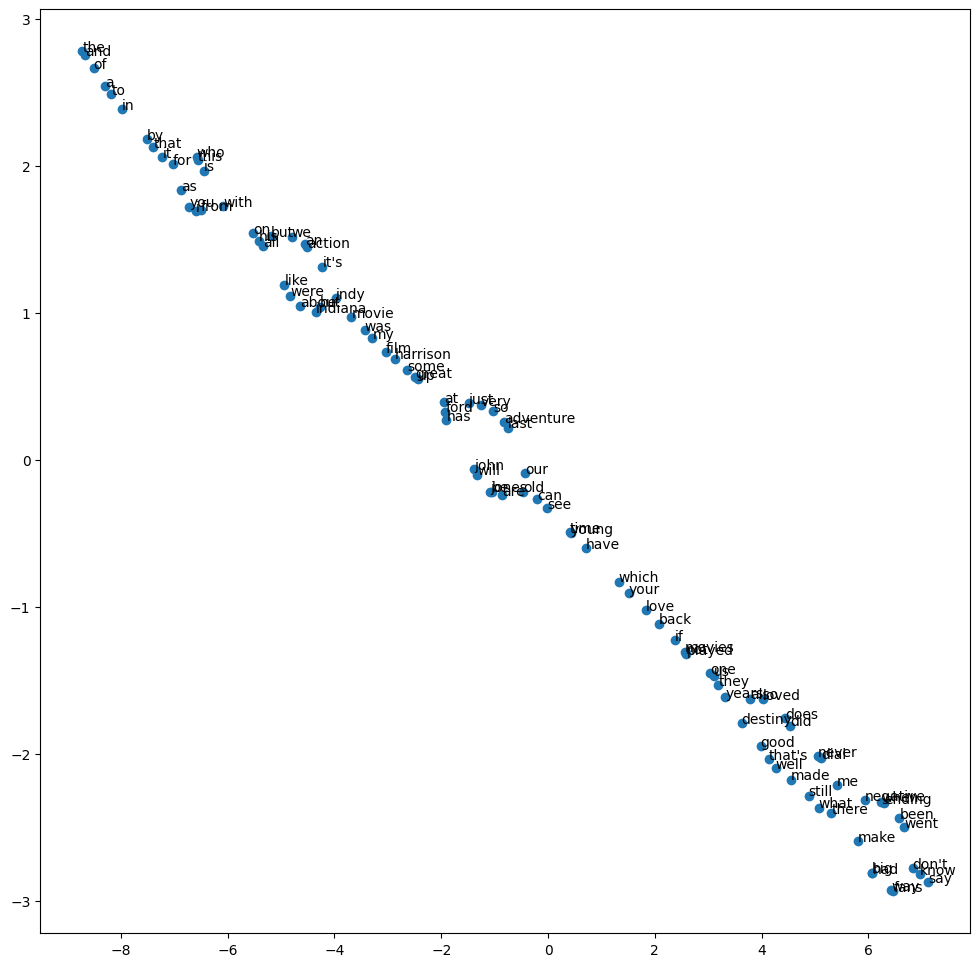

In [35]:
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming `documents` is a list of text documents
documents = read_csv( 'imdb_reviews_output.csv')[:100]
sentences = [doc.lower().split() for doc in documents]

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

# Use t-SNE to visualize the embeddings
word_vectors = model.wv
selected_words = word_vectors.index_to_key[:100]  # example: top 100 words
word_vectors = [word_vectors[word] for word in selected_words]

# Convert list to numpy array
word_vectors_np = np.array(word_vectors)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(word_vectors_np)

plt.figure(figsize=(12, 12))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
for i, word in enumerate(selected_words):
    plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]))
plt.show()








## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [36]:
# The GitHub link of your final csv file


# Link:
"https://github.com/vishnuvardhankonda/Assignment_3"


'https://github.com/vishnuvardhankonda/Assignment_3'

:# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
"If you are unable to use pre-existing libraries for specific tasks, such as producing word embeddings or computing TF-IDF, the complexity and effort necessary will grow dramatically. It necessitates a thorough comprehension of the algorithms and the ability to appropriately apply them.The project gives practical experience with real-world problems in natural language processing and sentiment analysis, providing great learning opportunities in these areas.The available time should ideally balance the necessity for a comprehensive study and analysis."


'If you are unable to use pre-existing libraries for specific tasks, such as producing word embeddings or computing TF-IDF, the complexity and effort necessary will grow dramatically. It necessitates a thorough comprehension of the algorithms and the ability to appropriately apply them.The project gives\xa0practical experience with real-world problems in natural language processing and sentiment analysis, providing great learning opportunities in these areas.The available time should ideally balance the necessity for a comprehensive study and analysis.'